In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df=pd.read_excel('processed_data.xlsx')

# What patterns can be observed in the occurrence of false alarms in the London Fire Brigade in relation to the time of day?

In [3]:
# Convert DateOfCall to datetime
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], format='%d %b %Y')

# Convert TimeOfCall to datetime.time
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall']).dt.time

# Convert columns to category data type
df['IncidentGroup'] = df['IncidentGroup'].astype('category')
df['StopCodeDescription'] = df['StopCodeDescription'].astype('category')
df['PropertyCategory'] = df['PropertyCategory'].astype('category')
df['PropertyType'] = df['PropertyType'].astype('category')
df['Postcode_district'] = df['Postcode_district'].astype('category')
df['IncGeo_WardName'] = df['IncGeo_WardName'].astype('category')
df['IncidentStationGround'] = df['IncidentStationGround'].astype('category')
df['FirstPumpArriving_DeployedFromStation'] = df['FirstPumpArriving_DeployedFromStation'].astype('category')

# Print data types
print(df.dtypes)

IncidentNumber                                   object
DateOfCall                               datetime64[ns]
CalYear                                           int64
TimeOfCall                                       object
HourOfCall                                        int64
IncidentGroup                                  category
StopCodeDescription                            category
PropertyCategory                               category
PropertyType                                   category
Postcode_district                              category
IncGeo_WardName                                category
Easting_rounded                                   int64
Northing_rounded                                  int64
IncidentStationGround                          category
FirstPumpArriving_AttendanceTime                float64
FirstPumpArriving_DeployedFromStation          category
NumStationsWithPumpsAttending                   float64
NumPumpsAttending                               

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()


In [5]:
#df['HourOfCall'] = scaler.fit_transform(df[['HourOfCall']])

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Filter the data to only include false alarms
false_alarms = df[df['IncidentGroup'] == 'False Alarm']

# Group the data by hour of the day and calculate the number of false alarms for each hour
hourly_counts = false_alarms.groupby('HourOfCall')['IncidentNumber'].count()

# Normalize the counts using min-max scaler
scaler = MinMaxScaler()
hourly_counts_normalized = scaler.fit_transform(hourly_counts.values.reshape(-1, 1))




In [8]:
#normalized the count because to make the graph accurate

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


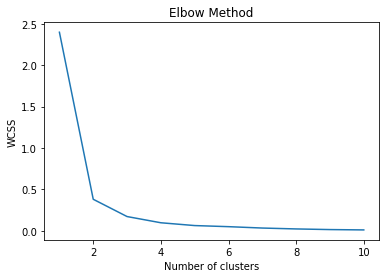

In [12]:
# Apply k-means clustering to group incidents with similar patterns of false alarms
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hourly_counts_normalized)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

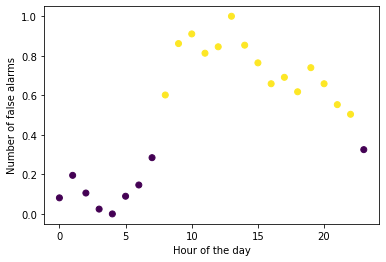

In [15]:
# From the elbow plot, we can see that the optimal number of clusters is 2.
kmeans = KMeans(n_clusters=2)
kmeans.fit(hourly_counts_normalized)

# Plot the clusters
plt.scatter(hourly_counts.index, hourly_counts_normalized, c=kmeans.labels_)
plt.xlabel('Hour of the day')
plt.ylabel('Number of false alarms')
plt.show()

# How resouces are wasted to deal with false alarm?

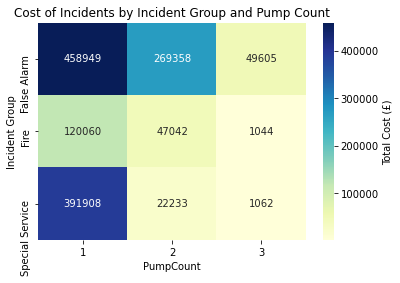

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group the data by the incident group and pump count, and sum the cost
cost_by_group_and_pump_count = df.groupby(["IncidentGroup", "PumpCount"])["Notional Cost (£)"].sum().reset_index()

# Pivot the table to get a matrix of costs by incident group and pump count
cost_matrix = cost_by_group_and_pump_count.pivot("IncidentGroup", "PumpCount", "Notional Cost (£)")

# Fill missing values with 0
cost_matrix = cost_matrix.fillna(0)

# Create a heatmap of the cost matrix
sns.heatmap(cost_matrix, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={"label": "Total Cost (£)"})

# Add axis labels and title
plt.xlabel("PumpCount")
plt.ylabel("Incident Group")
plt.title("Cost of Incidents by Incident Group and Pump Count")

plt.show()
